In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

math_study = pd.read_csv('stud_math.xls')

In [55]:
1. Проведём первичный анализ данных.

SyntaxError: invalid syntax (<ipython-input-55-7b8695cf241f>, line 1)

In [56]:
display(math_study.head())
math_study.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [ ]:
Датасет включает в себя данные о 395 учениках.
Данные состоят из 30 колонок(параметров), встречаются как числовые, так и строковые значения.
В некоторых колонках встречаются пустые значения.

In [ ]:
2. Напишем функцию для:
- распределения признака для числовых переменных
- определения процента пустых занчений
- проверки на наличие выбросов.

In [57]:
def first_analysis(column, limits=None):
    print('Параметр:', column)
    print('Распределение признака:')
    fig, ax = plt.subplots()
    # Проверка типа данных
    if math_study.loc[:, column].dtypes == np.dtype('O'):
        sns.countplot(math_study.loc[:, column], ax=ax)
        plt.show()
    else:
        math_study.loc[:, column].hist(ax=ax)
        ax.set_xlabel(column)
        ax.set_ylabel('count')
        plt.show()
        if limits is not None:  # Проверка на наличие выбросов
            if math_study.loc[(~math_study.loc[:, column].between(limits[0], limits[1])) &
                              pd.notnull(math_study.loc[:, column])].shape[0] > 0:
                print('Выбросы:')
                display(math_study.loc[(~math_study.loc[:, column].between(limits[0], limits[1])) &
                                       pd.notnull(math_study.loc[:, column])])
    print('Процент отсутствующих значений составляет:', str(
        round(100 - math_study.loc[:, column].count()/math_study.shape[0]*100, 2)) + '%')
    print()

Параметр: school
Распределение признака:


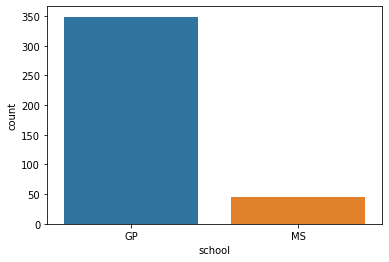

Процент отсутствующих значений составляет: 0.0%



In [58]:
first_analysis('school')

In [ ]:
Датасет составлен на базе данных двух школ, однако абсолютное большинство данных представлены из школы GP.

Параметр: sex
Распределение признака:


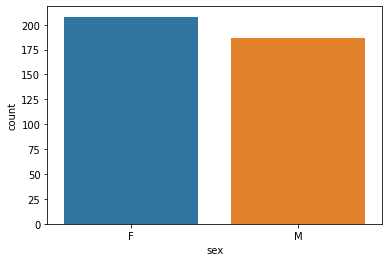

Процент отсутствующих значений составляет: 0.0%



In [10]:
first_analysis('sex')

Параметр: age
Распределение признака:


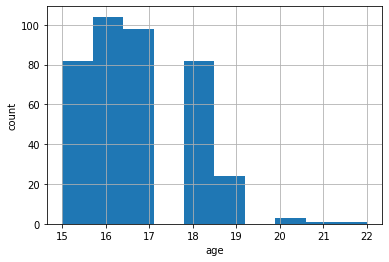

Процент отсутствующих значений составляет: 0.0%



In [11]:
first_analysis('age')

Параметр: address
Распределение признака:


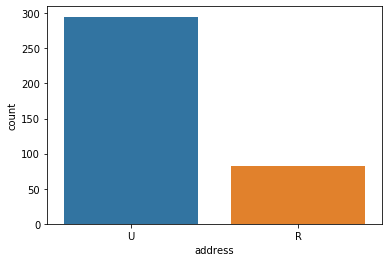

Процент отсутствующих значений составляет: 4.3%



In [12]:
first_analysis('address')

Параметр: famsize
Распределение признака:


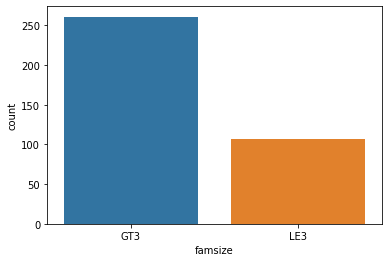

Процент отсутствующих значений составляет: 6.84%



In [13]:
first_analysis('famsize')

Параметр: Pstatus
Распределение признака:


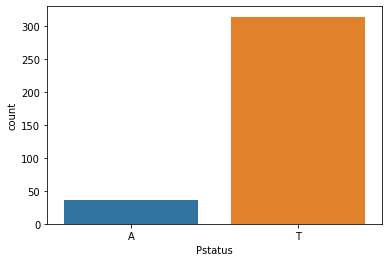

Процент отсутствующих значений составляет: 11.39%



In [14]:
first_analysis('Pstatus')

Параметр: Medu
Распределение признака:


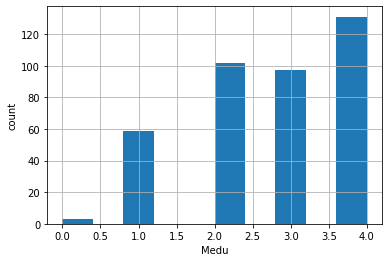

Процент отсутствующих значений составляет: 0.76%



In [15]:
first_analysis('Medu', limits=(0, 4))

Параметр: Fedu
Распределение признака:


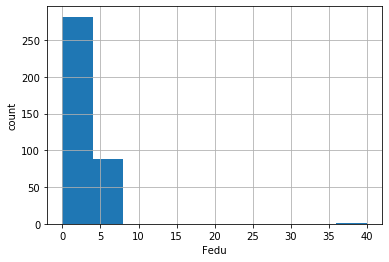

Выбросы:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,...,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


Процент отсутствующих значений составляет: 6.08%



In [16]:
first_analysis('Fedu', limits=(0, 4))

In [17]:
В параметре "Fedu" видим некорректное значение, которое не соответствует условиям датасета. Можно предположить, что ошибочно добавили 0 и истинное значение равно 4, однако мы для надежности оставим значения, соответствующие условиям.

SyntaxError: invalid syntax (<ipython-input-17-e117be204a18>, line 1)

In [18]:
math_study = math_study.loc[math_study.Fedu.between(
    0, 4) | pd.isnull(math_study.Fedu)]

Параметр: Mjob
Распределение признака:


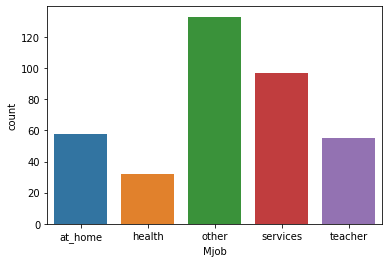

Процент отсутствующих значений составляет: 4.82%



In [19]:
first_analysis('Mjob')

Параметр: Fjob
Распределение признака:


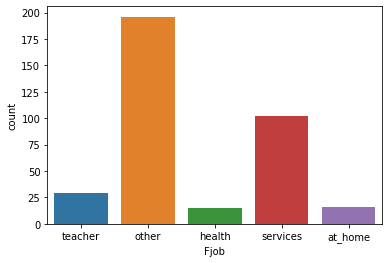

Процент отсутствующих значений составляет: 9.14%



In [20]:
first_analysis('Fjob')

Параметр: reason
Распределение признака:


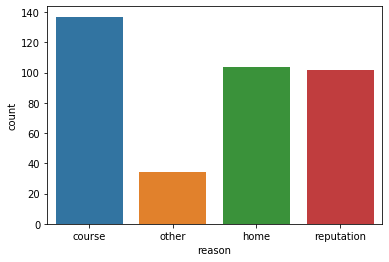

Процент отсутствующих значений составляет: 4.31%



In [21]:
first_analysis('reason')

Параметр: guardian
Распределение признака:


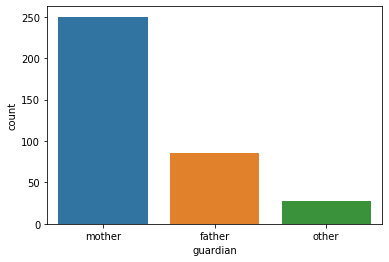

Процент отсутствующих значений составляет: 7.87%



In [22]:
first_analysis('guardian')

Параметр: traveltime
Распределение признака:


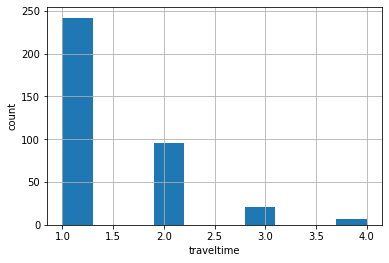

Процент отсутствующих значений составляет: 7.11%



In [23]:
first_analysis('traveltime', limits=(1, 4))

Параметр: studytime
Распределение признака:


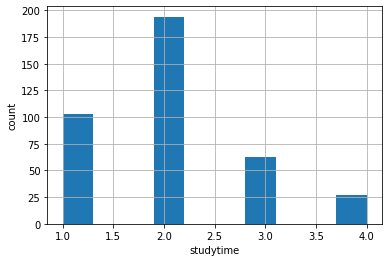

Процент отсутствующих значений составляет: 1.78%



In [24]:
first_analysis('studytime', limits=(1, 4))

Параметр: failures
Распределение признака:


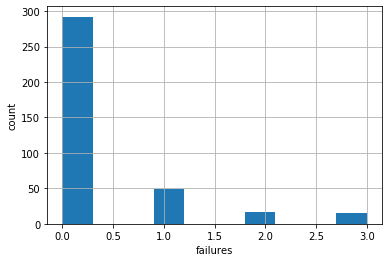

Процент отсутствующих значений составляет: 5.58%



In [25]:
first_analysis('failures', limits=(0, 4))

Параметр: schoolsup
Распределение признака:


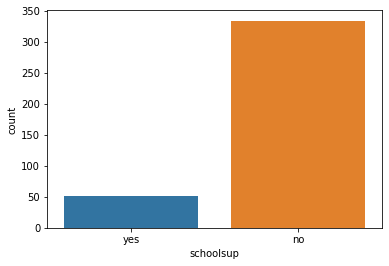

Процент отсутствующих значений составляет: 2.28%



In [26]:
first_analysis('schoolsup')

Параметр: famsup
Распределение признака:


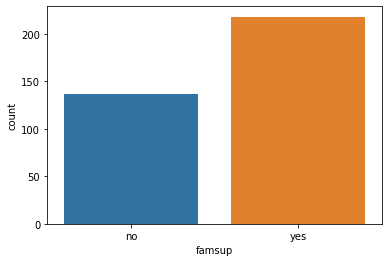

Процент отсутствующих значений составляет: 9.9%



In [27]:
first_analysis('famsup')

Параметр: paid
Распределение признака:


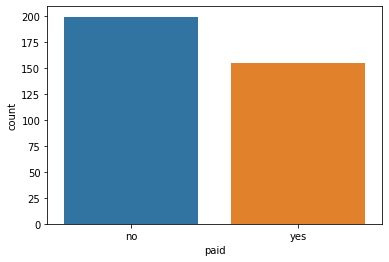

Процент отсутствующих значений составляет: 10.15%



In [28]:
first_analysis('paid')

Параметр: activities
Распределение признака:


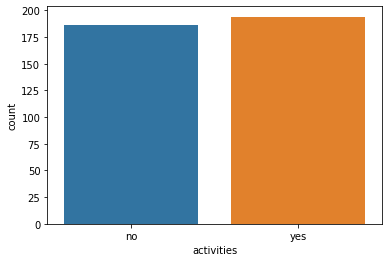

Процент отсутствующих значений составляет: 3.55%



In [29]:
first_analysis('activities')

Параметр: nursery
Распределение признака:


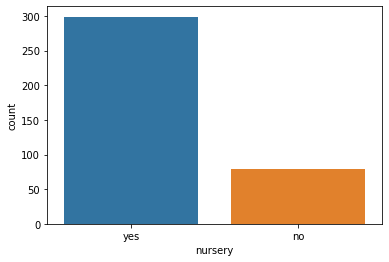

Процент отсутствующих значений составляет: 4.06%



In [30]:
first_analysis('nursery')

Параметр: studytime, granular
Распределение признака:


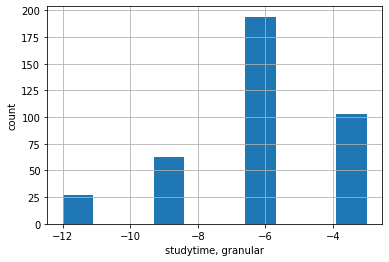

Процент отсутствующих значений составляет: 1.78%



In [31]:
first_analysis('studytime, granular')

In [32]:
Столбца 'studytime, granular' нет в условиях датафрейма, но процент пропусков достаточно низкий, можем его оставить.

SyntaxError: invalid syntax (<ipython-input-32-6213eb4d6b99>, line 1)

Параметр: higher
Распределение признака:


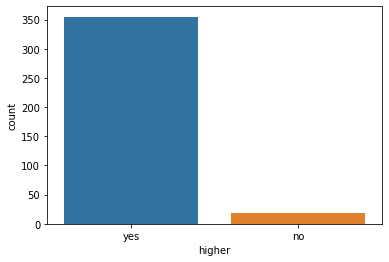

Процент отсутствующих значений составляет: 5.08%



In [33]:
first_analysis('higher')

Параметр: internet
Распределение признака:


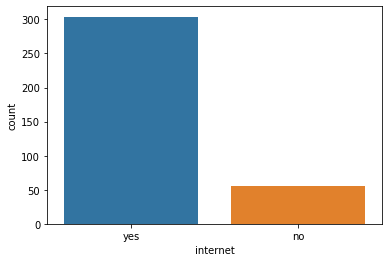

Процент отсутствующих значений составляет: 8.63%



In [34]:
first_analysis('internet')

Параметр: romantic
Распределение признака:


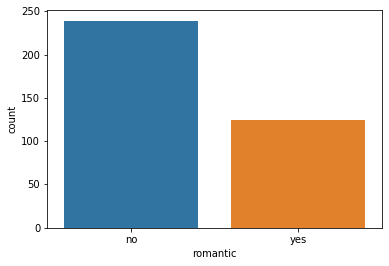

Процент отсутствующих значений составляет: 7.87%



In [35]:
first_analysis('romantic')

Параметр: famrel
Распределение признака:


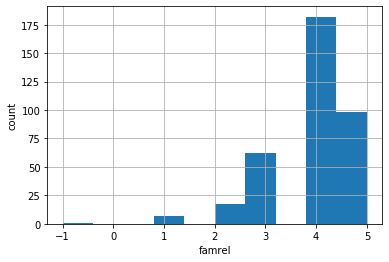

Выбросы:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,...,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


Процент отсутствующих значений составляет: 6.85%



In [36]:
first_analysis('famrel', limits=(1, 5))

In [37]:
В столбце femrel обнаружено значение, не соответствующее условиям датасета. Вероятнее всего, знак минус поставлен ошибочно. Для надежности оставим только значения, соответствующие условиям.

SyntaxError: invalid syntax (<ipython-input-37-f1a66fc41fb4>, line 1)

In [59]:
math_study = math_study.loc[math_study.famrel.between(
    1, 5) | pd.isnull(math_study.famrel)]

Параметр: freetime
Распределение признака:


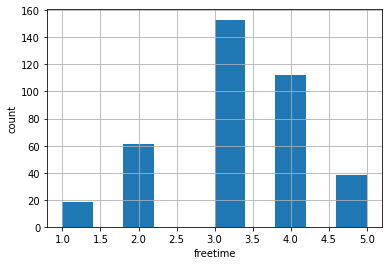

Процент отсутствующих значений составляет: 2.8%



In [39]:
first_analysis('freetime', limits=(1, 5))

Параметр: goout
Распределение признака:


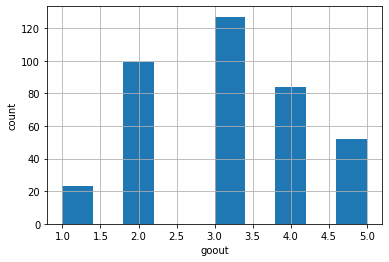

Процент отсутствующих значений составляет: 2.04%



In [40]:
first_analysis('goout', limits=(1, 5))

Параметр: health
Распределение признака:


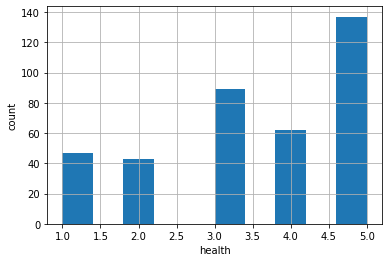

Процент отсутствующих значений составляет: 3.82%



In [41]:
first_analysis('health', limits=(1, 5))

Параметр: absences
Распределение признака:


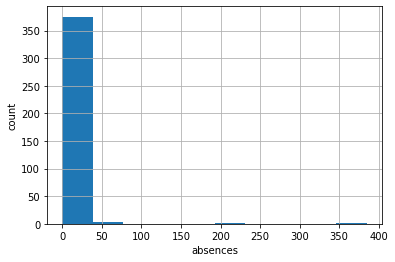

Процент отсутствующих значений составляет: 3.05%



In [42]:
first_analysis('absences')

In [43]:
Распределение 'absences' выглядит не очень читаемо, попробуем устранить выбросы с помощью формулы интерквартильного расстояния.

SyntaxError: invalid syntax (<ipython-input-43-fae65b8ce39b>, line 1)

In [44]:
perc25 = math_study.absences.quantile(0.25)
perc75 = math_study.absences.quantile(0.75)
IQR = perc75 - perc25
print('25-й перцентиль:', perc25)
print('75-й перцентиль:', perc75)
print('IQR:', IQR)

IQR = perc75 - perc25
math_study.loc[~math_study.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR), 'absences']

25-й перцентиль: 0.0
75-й перцентиль: 8.0
IQR: 8.0


24       NaN
40      25.0
74      54.0
101      NaN
103     26.0
120      NaN
129      NaN
150      NaN
172      NaN
183     56.0
198     24.0
205     28.0
215      NaN
216     22.0
222    385.0
227      NaN
254      NaN
260     21.0
265      NaN
270      NaN
276     75.0
277     22.0
280     30.0
307     38.0
313     22.0
315     40.0
320     23.0
352      NaN
390    212.0
Name: absences, dtype: float64

In [45]:
Можем предположить, что здесь присутсвуют ошибочные значения(слишулм большое кол-во пропущенных дней).
Таким образом, можем удалить выбросы, т.е. все значения, выше 20.

SyntaxError: invalid syntax (<ipython-input-45-dc1b7b2a5619>, line 1)

In [46]:
math_study = math_study.loc[math_study.absences.between(
    perc25 - 1.5*IQR, 20) | pd.isnull(math_study.absences)]

Параметр: absences
Распределение признака:


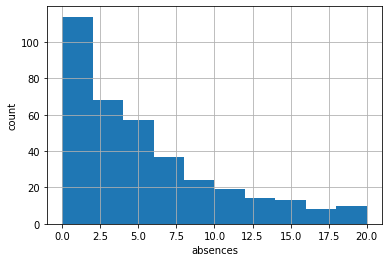

Процент отсутствующих значений составляет: 3.19%



In [47]:
first_analysis('absences')

Параметр: score
Распределение признака:


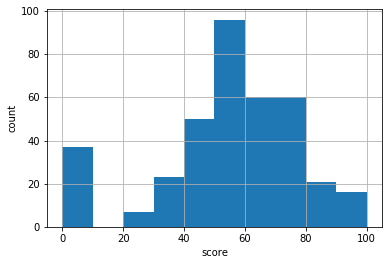

Процент отсутствующих значений составляет: 1.6%



In [48]:
first_analysis('score')

In [49]:
По параметру 'score' можно сделать вывод, что используется стобальная система оценки - от 0 до 100.
Также интересно большое кол-во нулевых баллов, однако учитывая, что'score' является главным параметром, на основании которого проводится анализ, мы не можем отнести нулевые оценки к выбросам или заменить их.

SyntaxError: invalid syntax (<ipython-input-49-d983c152e818>, line 1)

In [50]:
Подведём промежуточные итоги:
- процент пропусков составляет до 11 %, данные достаточно чистые.
- найдены и удалены выбросы, не соотвествующие условиям датасета, в колонках "Fedu" и " famrel".
- найдены и удалены выбросы по интерквартильному методу в колонке "absences".

SyntaxError: invalid syntax (<ipython-input-50-860ac3746551>, line 1)

In [51]:
3. Проведём корреляционный анализ для числовых параметров

SyntaxError: invalid syntax (<ipython-input-51-65ee8fb0f5d2>, line 1)

In [ ]:
sns.pairplot(math_study, kind='reg')

In [53]:
Используем для наглядности матрицу корреляций:

SyntaxError: invalid syntax (<ipython-input-53-d279446260cd>, line 1)

In [ ]:
math_study.corr()

In [ ]:
Высокой корреляции параметров со 'score' не обнаружено.

In [ ]:
Теперь очевидно, что 'studytime, granular' идентичен параметру 'study'. Удалим его.

In [ ]:
math_study.drop('studytime, granular', axis=1, inplace=True)

In [ ]:
math_study.corr()

In [ ]:
По итогам корреляционного анализа можно заключить, корреляция между баллами и другими параметрами достаточно слабая, самую низкую корреляцию с баллами за экзамен по математике имеют следующие параметры:
- время в пути
- отношения в семье
- свободное время после школы
- текущее состояние здоровья
- кол-во пропущенных занятий.

In [ ]:
4. Проведём анализ номинативных переменных в строковых колонках.

In [ ]:
С помощью функции посмотрим, различаются ли баллы в зависимости от значения переменных.

In [ ]:
def nom_analysis(column):
    # Проверка типа данных
    if math_study.loc[:, column].dtypes == np.dtype('O'):
        print('Параметр', column)
        print('Распределение баллов по значениям:')
        fig, ax = plt.subplots(figsize=(14, 4))
        sns.boxplot(x=column, y='score',
                    data=math_study,
                    ax=ax)
        plt.xticks(rotation=45)
        ax.set_title('Boxplot for ' + column)
        plt.show()
        combinations_all = list(combinations(
            math_study.loc[:, column].dropna().unique(), 2))
        for perm in combinations_all:
            if ttest_ind(math_study.loc[math_study.loc[:, column] == perm[0], 'score'].dropna(),
                         math_study.loc[math_study.loc[:, column] == perm[1], 'score'].dropna()).pvalue \
                    <= 0.05/len(combinations_all):  # Поправка Бонферони
                print('Найдены статистически значимые различия для колонки', column)
                break

In [ ]:
for column in math_study.columns:
    nom_analysis(column)

In [ ]:
Исходя из результатов номинативного анализа, статистически значимые различия определены в колонках:
- sex
- address
- Mjob
- schoolsup
- paid
- higher
- romantic

In [ ]:
Остальные столбцы согласно заданию мы исключаем:

In [ ]:
math_study.drop(['school', 'famsize', 'Pstatus', 'Fjob', 'reason', 'guardian', 'famsup', 'activities',
                 'nursery', 'internet'], axis=1, inplace=True)

In [62]:
math_study.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [ ]:
Выводы:
1. Процент отсутсвующих значений в большинстве столбцов варьируется от 1 до 11 % .
В трёх столбцах - school, sex, age отсутствующих значений нет.
Заполнение отстутствующих значений нулями или медианами на данном этапе может серьезно исказить результаты исследования.

2. Выбросы обнаружены в трёх столбцах: 'Fedu', 'famrel', 'absences'.
Можно сделать вывод, что в целом данные качественные.

3. Корелляция числовых параметров с успеваемостью в целом достаточно низкая.
Самые низкие коэффициенты корреляции у следующих параметров:
- время в пути
- отношения в семье
- свободное время после школы
- текущее состояние здоровья
- кол-во пропущенных занятий.
Однако из-за того, что высокой корреляции анализ не выявил, удаление вышеуказаннызх столбцов преждевременно.

4. Номинативный анализ показал, что наиболее важными параметрами, которые предлагается использовать в дальнейшем для построения модели, являются:
- пол
- тип адреса
- работа матери
- доп. образовательная поддержка
- доп. платные занятия по математике
- желание получить высшее образование
- романтические отношения


5. Данные представлены только из двух школ, при этом большая часть данных относится к школе 'GP'.
Исходя из того, что задача стоит повысить успеваемость учеников по всему миру, выборка кажется недостаточно репрезентативной или применимой только к школе 'GP'.